# Part 1 - Initial IMDB Data Processing
- James M. Irving

## Business Problem

<img src="Images/movies-generic-header.png" width=300px>

> I have been hired to produce analyze IMDB's extensive publicly-available dataset, supplement it with financial data from TMDB's API, convert the raw data into a MySQL database, and then use that database for extracting insights and recommendations on how to make a successful movie.

I will use a combination of machine-learning-model-based insights and hypothesis testing to extract insights for our stakeholder.
    

  
### Specifications/Constraints    
- The stakeholder wants to focus on attributes of the movies themselves, vs the actors and directors connected to those movies. 
- They only want to include information related to movies released in the United States.
- They also did not want to include movies released before the year 2000.
- The stakeholder is particularly interested in how the MPAA rating, genre(s), runtime, budget, and production companies influence movie revenue and user-ratings.

# Initial IMDB Data Processing

### IMDB Movie Metadata
- I will download fresh movie metadata from IMDB's public datasets and filter out movies that meet the stakeholder's requirements/constraints.

- IMDB Provides Several Files with varied information for Movies, TV Shows, Made for TV Movies, etc.
    - Overview/Data Dictionary: <a href="https://www.imdb.com/interfaces/" target="_blank">https://www.imdb.com/interfaces/</a>

    - Downloads page: <a href="https://datasets.imdbws.com/" target="_blank">https://datasets.imdbws.com/</a>
- Files to use:
    - title.basics.tsv.gz
    - title.ratings.tsv.gz
    - title.akas.tsv.gz
  

## Imports and Downloading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

In [2]:
## Importing custom function for project
%load_ext autoreload
%autoreload 2
import project_functions as pf

In [3]:
## Making "Data" Folder to save IMDB files
os.makedirs("Data/",exist_ok=True)
sorted(os.listdir("Data/"))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json']

## Processing Title Basics

In [4]:
## title basics 
url_title_basics = 'https://datasets.imdbws.com/title.basics.tsv.gz'
basics = pd.read_csv(url_title_basics, sep='\t',low_memory=False)
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9381842 entries, 0 to 9381841
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 644.2+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### Specified Filtering/Cleaning Steps:
- Permanent Steps
    - Replace "\N" with np.nan
    - keep only titleType==Movie
    - keep startYear 2000-2022
    
- Steps to Revisit/Reconsider:
    - Eliminate movies that include  "Documentary" in genre (see tip below)
    - Eliminate movies that are null for runtimeMinutes
    - Eliminate movies that are null for genre


In [5]:
# pf.check_nulls_nunique()
# def check_nulls_nunique(df,plot=True):
#     report = pd.DataFrame({"# null":df.isna().sum(),
#                  "% null":df.isna().sum()/len(df)*100,
#                  '# unique':df.nunique(),
#                           '% unique':df.nunique()/len(df)*100})
#     display(report.round(2))
#     if plot:
#         missingno.matrix(df)
#         plt.show()
    

#### Check for Nulls Values & \N placeholders

,# null,% null,# unique,% unique
tconst,0,0.0,9381842,100.00
titleType,0,0.0,11,0.00
primaryTitle,11,0.0,4291802,45.75
originalTitle,11,0.0,4312593,45.97
isAdult,0,0.0,9,0.00
startYear,0,0.0,151,0.00
endYear,0,0.0,96,0.00
runtimeMinutes,0,0.0,878,0.01
genres,10,0.0,2331,0.02


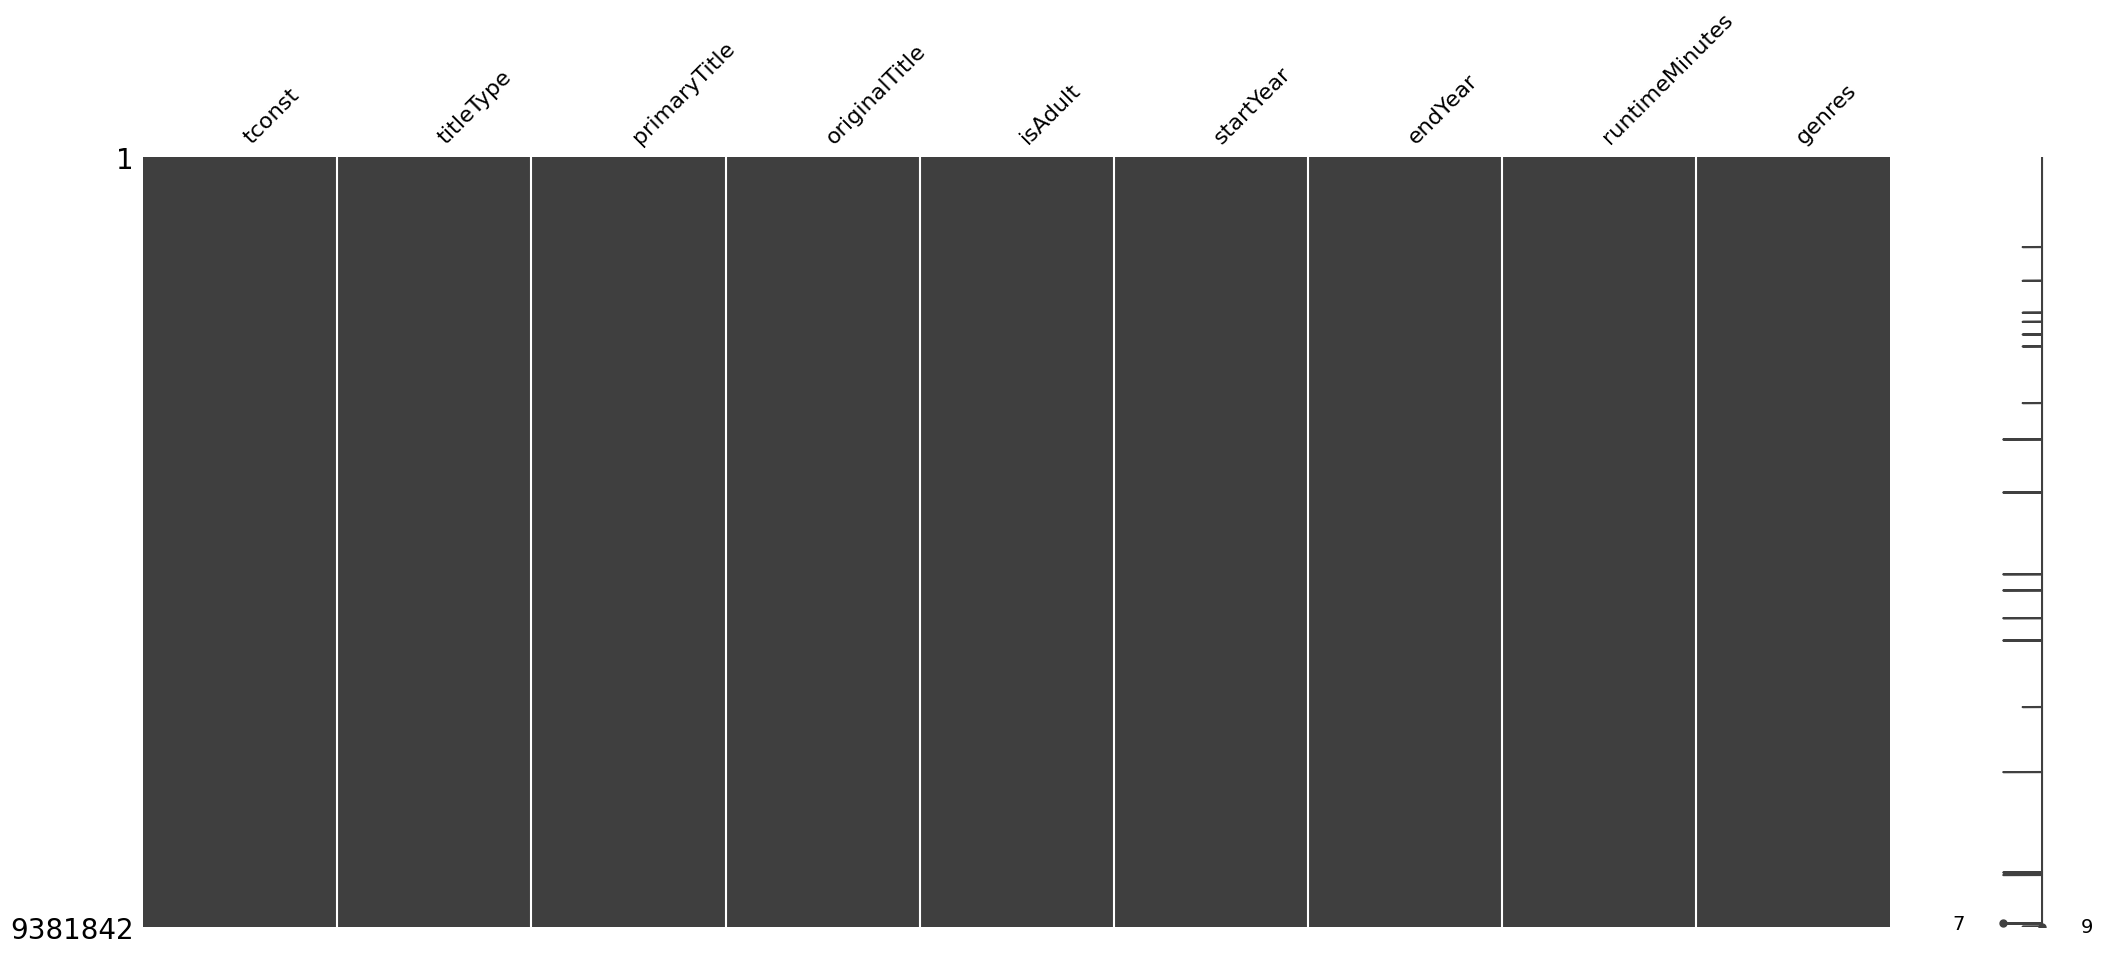

In [6]:
## checking null values
pf.check_nulls_nunique(basics)

,# null,% null,# unique,% unique
tconst,0,0.00,9381842,100.00
titleType,0,0.00,11,0.00
primaryTitle,11,0.00,4291802,45.75
originalTitle,11,0.00,4312593,45.97
isAdult,1,0.00,8,0.00
startYear,1259702,13.43,150,0.00
endYear,9283088,98.95,95,0.00
runtimeMinutes,6778225,72.25,877,0.01
genres,430726,4.59,2330,0.02


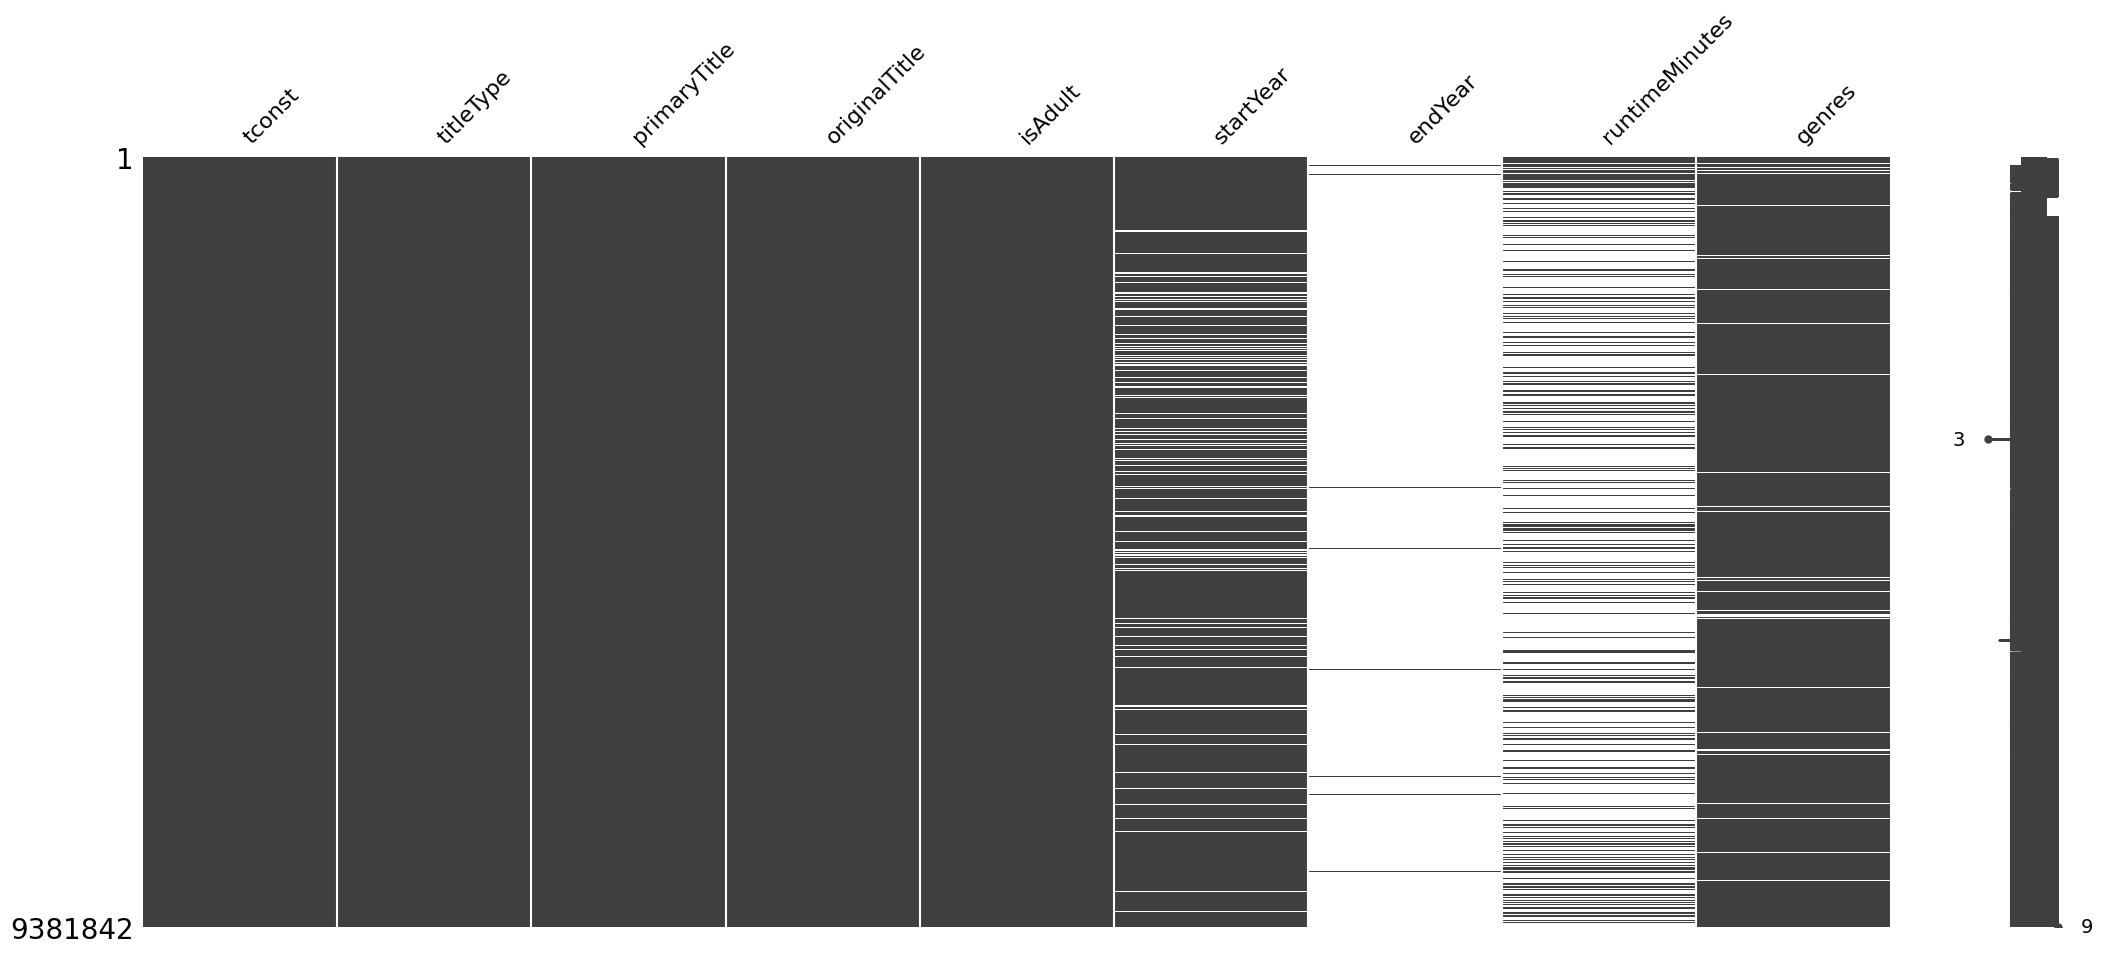

In [7]:
## Replace "\N" with np.nan
basics.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(basics)

##### Observations:
- Note: `endYear` is a pretty worthless column, in relation to movies. For TV shows, this would have potentially been worth keeping. 
    - Decision: Drop column.
- `tconst` vs `primary_title`:
    - I find it somehow odd that there are unique tconst values for every row, but that only ~ 46% of the titles are unique values.
        - Decision: change nothing, for now, but remember this for later.
        
- `genres` are missing for <5% of the movies.
    - Decision: we care about genre, so we will drop null values from genre.

- `startYear` is missing for 13% of the data. This may reflect movies that yet to be released.
    - Decision: drop null values for now. Alternative future approach would be to confirm movie status by joining with other table containing release information.
    
- `runtimeMinutes` is missing from a whopping 73% of the data. 
    - Decision: since this is a feature we care about, it is vital to our analysis. We will drop null values from this feature to reduce the overall number of API calls needed in Part 2.

In [8]:
## Eliminate movies that are null for runtimeMinute, genres, and startYear
basics = basics.dropna(subset=['runtimeMinutes','genres','startYear'])
pf.check_nulls_nunique(basics, plot=False)

,# null,% null,# unique,% unique
tconst,0,0.0,2443711,100.00
titleType,0,0.0,10,0.00
primaryTitle,1,0.0,1711806,70.05
originalTitle,1,0.0,1729734,70.78
isAdult,0,0.0,2,0.00
startYear,0,0.0,149,0.01
endYear,2397214,98.1,92,0.00
runtimeMinutes,0,0.0,857,0.04
genres,0,0.0,2203,0.09


In [9]:
## drop endYear
basics = basics.drop(columns=['endYear'])
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...
9381792,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,49,Documentary
9381798,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,43,"Family,Game-Show,Reality-TV"
9381833,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,11,"Adventure,Animation,Comedy"
9381840,tt9916856,short,The Wind,The Wind,0,2015,27,Short


### Filtering for Stakeholder Specifications

#### Keeping only Full-Length Movies Released in Theaters

In [10]:
## Checking title types
basics['titleType'].value_counts()

tvEpisode       1105439
short            577077
movie            366087
video            176242
tvMovie           88756
tvSeries          87077
tvSpecial         16996
tvMiniSeries      16345
tvShort            9382
videoGame           310
Name: titleType, dtype: int64

In [11]:
## keep only titleType==Movie
basics = basics.loc[ basics['titleType']=='movie']
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
930,tt0000941,movie,Locura de amor,Locura de amor,0,1909,45,Drama
...,...,...,...,...,...,...,...,...
9381607,tt9916362,movie,Coven,Akelarre,0,2020,92,"Drama,History"
9381691,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,123,Drama
9381732,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,57,Documentary
9381759,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,100,Documentary


#### Eliminating Documentaries

In [12]:

is_documentary = basics['genres'].str.contains('documentary',case=False)
is_documentary.value_counts()

False    278611
True      87476
Name: genres, dtype: int64

In [13]:
# ## Eliminate movies that include  "Documentary" in genre 
# is_documentary = basics['genres'].str.contains('documentary',case=False)
# basics = basics[~is_documentary]
# basics.head()

In [14]:
### Convert startyear to numeric for slicing
## convert numeric features
basics['startYear'] = basics['startYear'].astype(float)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_61526/3247079554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics['startYear'] = basics['startYear'].astype(float)


In [15]:
## keep startYear 2000-2022
basics = basics[(basics['startYear']>=2000)&(basics['startYear']<2023)]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
13079,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021.0,133,Documentary
34793,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61095,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,70,Drama
66312,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006.0,47,Documentary
67643,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
...,...,...,...,...,...,...,...,...
9381607,tt9916362,movie,Coven,Akelarre,0,2020.0,92,"Drama,History"
9381691,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019.0,123,Drama
9381732,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015.0,57,Documentary
9381759,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007.0,100,Documentary


## Processing Title Ratings

#### Specified Filtering Steps:
- Ratings
    - Replace "\N" with np.nan (if any)
    
- Keep movies that are in final filtered basics dataframe


In [16]:
## title ratings
url_title_ratings ="https://datasets.imdbws.com/title.ratings.tsv.gz"
ratings = pd.read_csv(url_title_ratings,sep='\t',low_memory=False)
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248405 entries, 0 to 1248404
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1248405 non-null  object 
 1   averageRating  1248405 non-null  float64
 2   numVotes       1248405 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.6+ MB


,tconst,averageRating,numVotes
0,tt0000001,5.7,1922
1,tt0000002,5.8,259
2,tt0000003,6.5,1736
3,tt0000004,5.6,174
4,tt0000005,6.2,2549


,# null,% null,# unique,% unique
tconst,0,0.0,1248405,100.00
averageRating,0,0.0,91,0.01
numVotes,0,0.0,20780,1.66


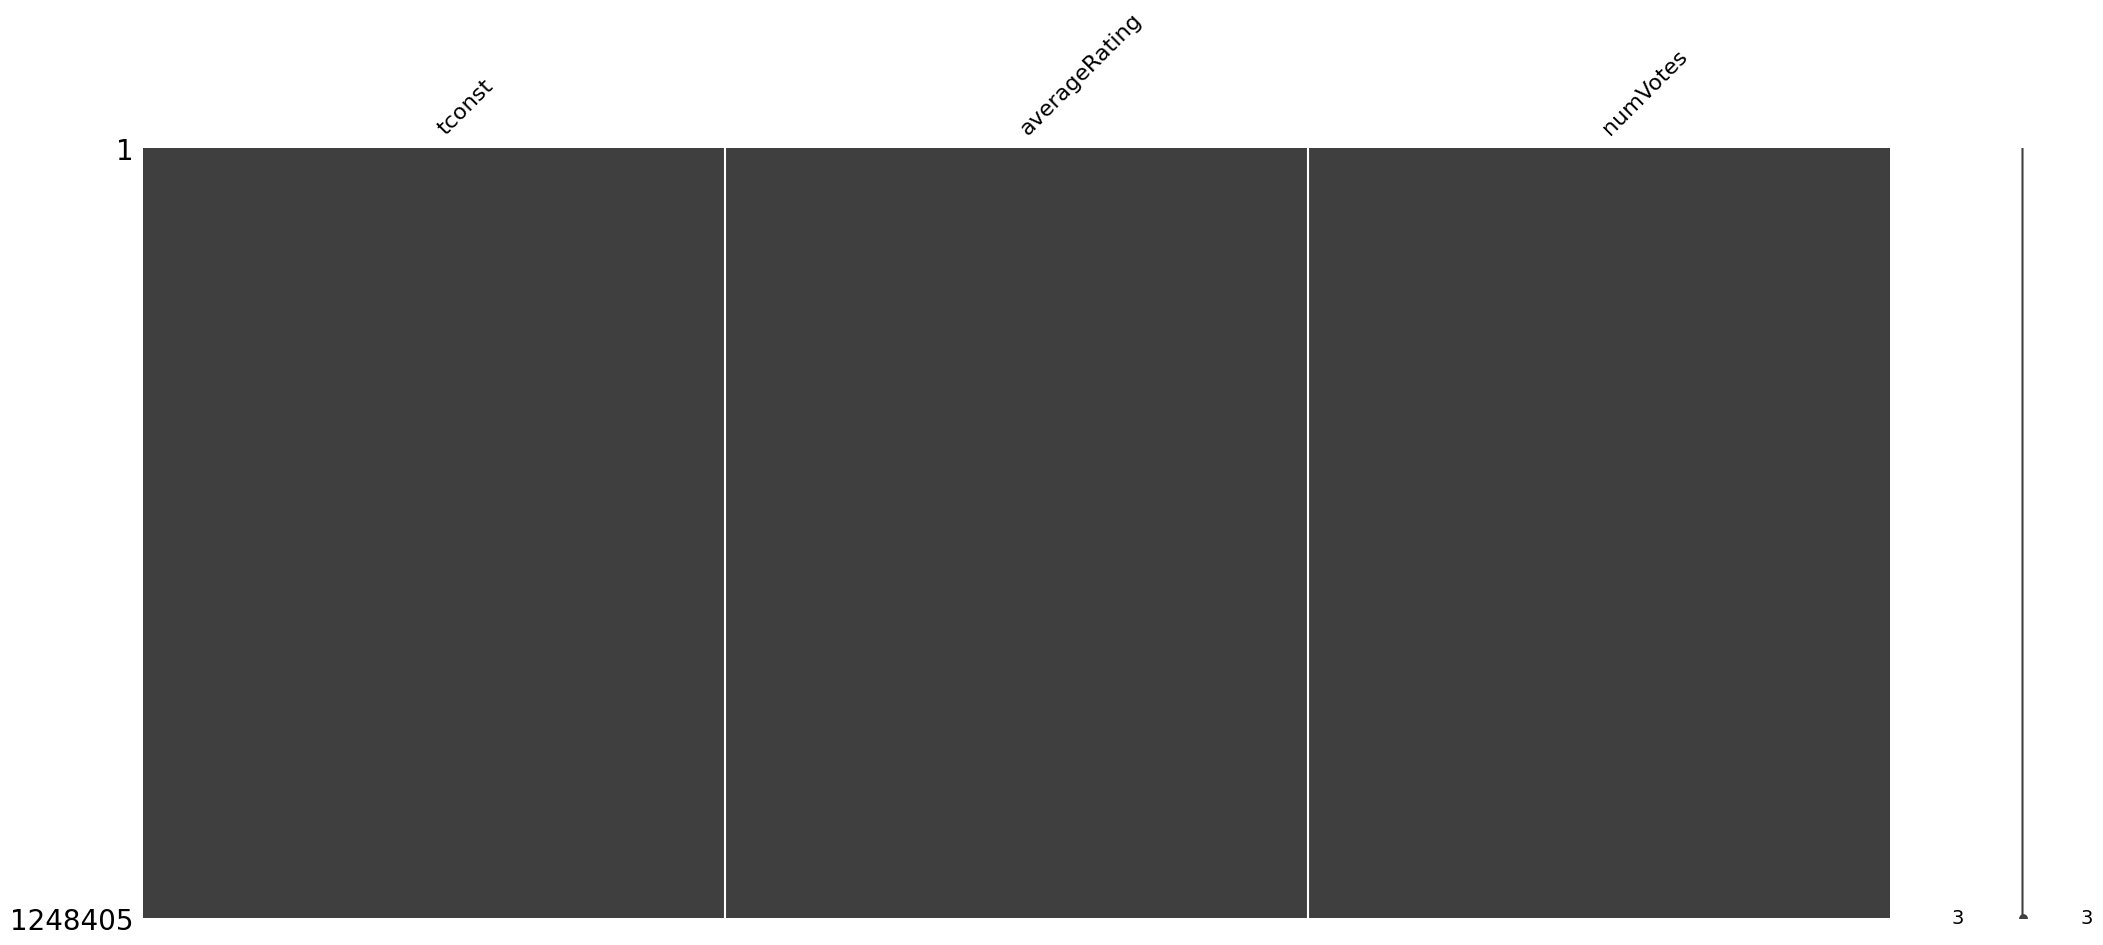

In [17]:
# Replace "\N" with np.nan (if any)
ratings.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(ratings)

## Processing Title AKAs

#### Specified Filtering Steps:
- keep only US entries.
- Replace "\N" with np.nan

In [18]:
## title AKAs
url_title_akas ="https://datasets.imdbws.com/title.akas.tsv.gz"
akas = pd.read_csv(url_title_akas,sep='\t',low_memory=False)
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33873510 entries, 0 to 33873509
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 2.0+ GB


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [19]:
## The AKAs file has the information on country where it released and language
akas = akas[(akas['region'] == 'US')]
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
36,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
41,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
33873182,tt9916702,1,Loving London: The Playground,US,\N,\N,\N,0
33873219,tt9916720,10,The Demonic Nun,US,\N,tv,\N,0
33873221,tt9916720,12,The Nun 2,US,\N,imdbDisplay,\N,0
33873238,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


In [20]:
# ## check for null values
# akas.isna().sum()

,# null,% null,# unique,% unique
titleId,0,0.00,1290310,94.17
ordering,0,0.00,118,0.01
title,0,0.00,1057806,77.20
region,0,0.00,1,0.00
language,1366512,99.73,8,0.00
types,403813,29.47,13,0.00
attributes,1324907,96.69,163,0.01
isOriginalTitle,1375,0.10,2,0.00


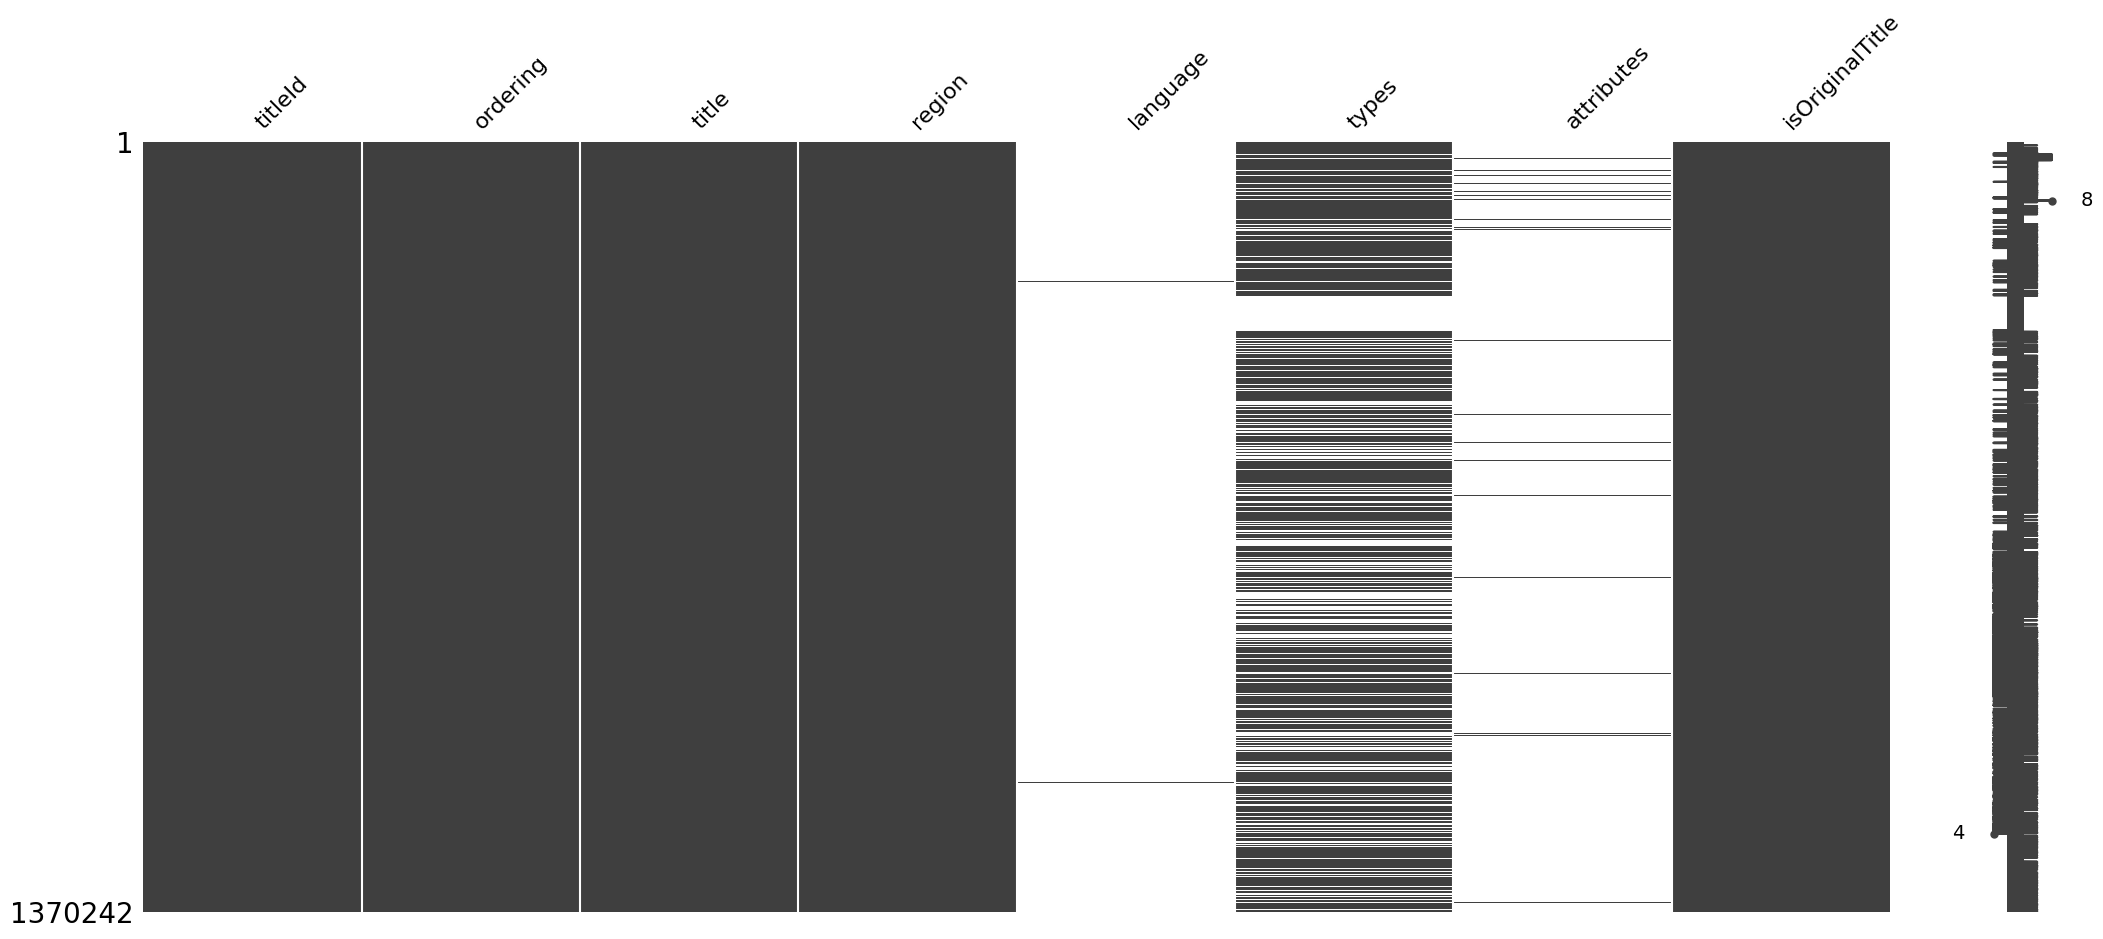

In [21]:
## replace\N placeholders with NaN and re-check for nuls
akas.replace({'\\N':np.nan},inplace=True)
pf.check_nulls_nunique(akas)

#### Observations:
- `language`: workthless, drop it.
- `types`: explore

In [22]:
akas.drop(columns='language',inplace=True)
akas.head()

,titleId,ordering,title,region,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0


#### Exploring Types

<AxesSubplot:>

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 2 missing from current font.
  font.set_text(s, 0, flags=flags)


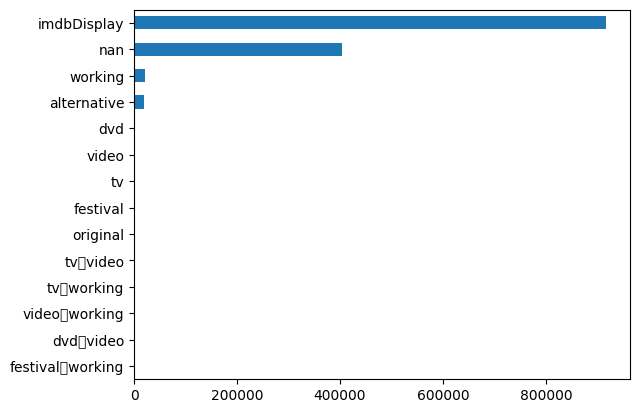

In [23]:
akas['types'].value_counts(dropna=False).sort_values().plot(kind='barh')

> Keep all types, since this table will mainly be used for filtering region and perhaps referenced later for comparing duplicate titles that had unique ids in title basics.

## Final Filtering: Removing Non-US Movies

- Now that both AKAs and basics have been processed, we can remove any movie ids from title basics that are NOT in the US-filtered AKAs dataframe.

### Removing Non-US From Title Basics

In [24]:
## Only keep movie ids that are in the final filtered akas
keepers = basics['tconst'].isin(akas['titleId'])
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34793,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61095,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,70,Drama
66312,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006.0,47,Documentary
67643,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
86773,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...
9381195,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019.0,70,Documentary
9381374,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019.0,97,"Comedy,Drama,Fantasy"
9381514,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,51,Drama
9381523,tt9916190,movie,Safeguard,Safeguard,0,2020.0,95,"Action,Adventure,Thriller"


### Removing Non-US From Ratings

- I originally used the AKAs table to filter out which movies to keep from ratings.
- I decided to compare using the AKAs table VS the using the basics table, which has already had non-US movies removed.
- Since I will 

In [25]:
## Keeping only movie that exist in basics 
keepers_akas = ratings['tconst'].isin(akas['titleId'])
keepers_basics = ratings['tconst'].isin(basics['tconst'])

print('- If filter using AKAs:')
display(keepers_akas.value_counts())

print('- If filter using Basics:')
display(keepers_basics.value_counts())

- If filter using AKAs:


False    772585
True     475820
Name: tconst, dtype: int64

- If filter using Basics:


False    1160588
True       87817
Name: tconst, dtype: int64

> **MUST DECIDE HOW TO DETERMINE FINAL KEEERS AND IF REMOVING DOCUMENTARIES OR NOT**

In [26]:
ratings_final = ratings[keepers_basics]
ratings_final

,tconst,averageRating,numVotes
17635,tt0035423,6.4,85245
40311,tt0062336,6.4,163
44960,tt0067683,6.4,90
46161,tt0069049,6.7,7435
63103,tt0088751,5.2,327
...,...,...,...
1248348,tt9915436,7.4,5
1248362,tt9915872,7.7,8
1248375,tt9916170,7.0,7
1248376,tt9916190,3.7,238


## Saving Final Files

#### Saving Title Basics

In [27]:
## Saving and immediately loading (to verify)
basics.to_csv('Data/title_basics_cleaned.csv.gz',compression='gzip',index=False)
basics = pd.read_csv('Data/title_basics_cleaned.csv.gz')
basics.info()
basics.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116404 entries, 0 to 116403
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          116404 non-null  object 
 1   titleType       116404 non-null  object 
 2   primaryTitle    116404 non-null  object 
 3   originalTitle   116404 non-null  object 
 4   isAdult         116404 non-null  int64  
 5   startYear       116404 non-null  float64
 6   runtimeMinutes  116404 non-null  int64  
 7   genres          116404 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.1+ MB


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El Tango del Viudo y Su Espejo Deformante,0,2020.0,70,Drama
2,tt0067683,movie,Workers '71: Nothing About Us Without Us,Robotnicy 1971 - Nic o nas bez nas,0,2006.0,47,Documentary
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"


#### Saving Title Ratings

In [28]:
ratings_final.to_csv('Data/title_ratings_cleaned.csv.gz',compression='gzip',index=False)
ratings = pd.read_csv('Data/title_ratings_cleaned.csv.gz')
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87817 entries, 0 to 87816
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         87817 non-null  object 
 1   averageRating  87817 non-null  float64
 2   numVotes       87817 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ MB


,tconst,averageRating,numVotes
0,tt0035423,6.4,85245
1,tt0062336,6.4,163
2,tt0067683,6.4,90
3,tt0069049,6.7,7435
4,tt0088751,5.2,327


#### Saving Title AKAs

In [29]:
akas.to_csv('Data/title_akas_cleaned.csv.gz',compression='gzip',index=False)
akas = pd.read_csv('Data/title_akas_cleaned.csv.gz')
akas.info()
akas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370242 entries, 0 to 1370241
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   titleId          1370242 non-null  object 
 1   ordering         1370242 non-null  int64  
 2   title            1370242 non-null  object 
 3   region           1370242 non-null  object 
 4   types            966429 non-null   object 
 5   attributes       45335 non-null    object 
 6   isOriginalTitle  1368867 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 73.2+ MB


,titleId,ordering,title,region,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,alternative,NaN,0.0


### Optional Check for files in Data folder

In [30]:
# optional 
sorted(os.listdir("Data/"))

['combined_tmdb_api_data.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2002.csv.gz',
 'final_tmdb_data_2003.csv.gz',
 'final_tmdb_data_2004.csv.gz',
 'final_tmdb_data_2005.csv.gz',
 'final_tmdb_data_2006.csv.gz',
 'final_tmdb_data_2007.csv.gz',
 'final_tmdb_data_2008.csv.gz',
 'final_tmdb_data_2009.csv.gz',
 'final_tmdb_data_2010.csv.gz',
 'final_tmdb_data_2011.csv.gz',
 'final_tmdb_data_2012.csv.gz',
 'final_tmdb_data_2013.csv.gz',
 'final_tmdb_data_2014.csv.gz',
 'final_tmdb_data_2015.csv.gz',
 'final_tmdb_data_2016.csv.gz',
 'final_tmdb_data_2017.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas_cleaned.csv.gz',
 'title_basics_cleaned.csv.gz',
 'title_ratings_cleaned.csv.gz',
 'tmdb_api_results_2000.json']

## Final Movie Count

In [31]:
print(f"There are {len(basics):,} rows in title_basics")
print(f"There are {len(ratings):,} rows in title_ratings")
print(f"There are {len(akas):,} rows in akas")

There are 116,404 rows in title_basics
There are 87,817 rows in title_ratings
There are 1,370,242 rows in akas


> See notebook "`Part 2A - TMDB API Calls.ipynb`" for the next part of the analysis.